<a href="https://colab.research.google.com/github/MouliChintakunta-AI/DLTutors/blob/main/VectorizedBackpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,log_loss
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelBinarizer
from tqdm import tqdm_notebook
import matplotlib.colors

In [119]:
np.random.seed(0)
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,4)
print(W1)
print(W2)

[[1.76405235 0.40015721]
 [0.97873798 2.2408932 ]]
[[ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]]


In [2]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors = ['red','yellow','green','blue','orange','violet','purple'])

In [27]:
data,labels = datasets.make_blobs(n_samples = 1000,n_features = 2,centers= 4,random_state = 0)
lb = LabelBinarizer()
multi_labels = lb.fit_transform(labels)

In [28]:
multi_labels.shape

(1000, 4)

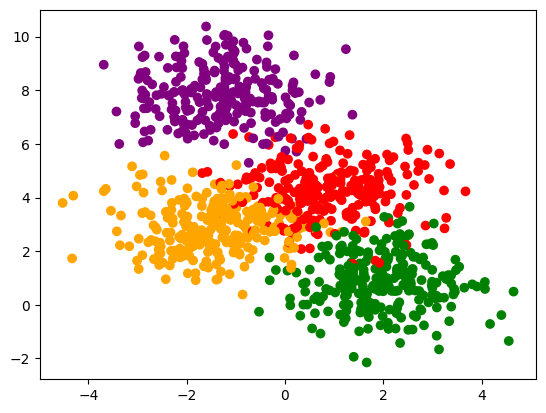

In [4]:
plt.scatter(data[:,0],data[:,1],c= labels,cmap = my_cmap)

In [5]:
binarized_labels = np.mod(labels,2)

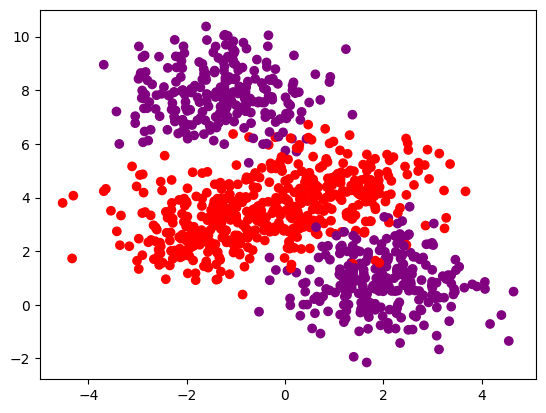

In [6]:
plt.scatter(data[:,0],data[:,1],c= binarized_labels,cmap = my_cmap)

In [53]:
np.random.seed(0)

In [107]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,stratify= labels,random_state= 0)
Y_train_oh = lb.fit_transform(Y_train)
Y_test_oh = lb.fit_transform(Y_test)

In [ ]:
np.argmax(Y_train,axis = 1)

In [115]:
class VectorizedBackPropagation:

  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self,x):
    return 1.0 / (1.0 + np.exp(-x))

  def softmax(self,x):
    exp = np.exp(x)
    return exp/np.sum(exp)

  def grad_sigmoid(self,x):
    return x * (1 - x)

  def forward_pass(self,x):
    X = x.reshape(1,-1)
    self.A1 = np.matmul(X,self.W1) + self.B1
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2
    self.H2 = self.softmax(self.A2)
    return self.H2

  def grad(self,x,y):
    self.forward_pass(x)
    x = x.reshape(1,-1)
    y = y.reshape(1,-1)
    self.dA2 = self.H2 - y
    self.dW2 = np.matmul(self.H1.T,self.dA2)
    self.dB2 = self.dA2
    self.dH1 = np.matmul(self.dA2,self.W2.T)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))
    self.dW1 = np.matmul(x.T,self.dA1)
    self.dB1 = self.dA1

  def fit(self,X,Y,epochs=1000, learning_rate = 1e-3,display_loss = True,initialise = False):
    if initialise:
      self.W1= np.random.randn(2,2)
      self.W2 = np.random.randn(2,4)
      self.B1 = np.zeros((1,2))
      self.B2 = np.zeros((1,4))
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs),desc = "training Vectorized back prop",unit='epoch'):
      dw1 = np.zeros((2,2))
      dw2 = np.zeros((2,4))
      db1 = np.zeros((1,2))
      db2 = np.zeros((1,4))
      for x,y in zip(X,Y):
        self.grad(x,y)
        dw1 += self.dW1
        dw2 += self.dW2
        db1 += self.dB1
        db2 += self.dB2
      m = X.shape[0]
      self.W1 -= learning_rate * (dw1 /m)
      self.W2 -= learning_rate * (dw2/ m)
      self.B1 -= learning_rate * (db1 /m)
      self.B2 -= learning_rate * (db2 /m)
      if display_loss:
        Y_pred = self.predict(X)
        #print("Argmax:",np.argmax(Y,axis = 1))
        #print("Y_pred",Y_pred)
        loss[i] = log_loss(np.argmax(Y,axis = 1),Y_pred)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self,X):
    y_pred = []
    for x in X:
      pred = self.forward_pass(x)
      y_pred.append(pred)
    return np.array(y_pred).squeeze()

# Input + Vectorized backpropagation

In [135]:
class InputVectorizedBackPropagation:

  def __init__(self,W1,W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((1,2))
    self.B2 = np.zeros((1,4))

  def sigmoid(self,X):
    return 1.0 / (1.0 + np.exp(-X))

  def softmax(self,X):
    exp = np.exp(X)
    #print("Softmax:",exp/np.sum(exp,axis=1).reshape(-1,1))
    return exp/np.sum(exp,axis=1).reshape(-1,1)


  def grad_sigmoid(self,X):
    return X * (1 - X)

  def forward_pass(self,X):
    self.A1 = np.matmul(X,self.W1) + self.B1
    self.H1 = self.sigmoid(self.A1)
    self.A2 = np.matmul(self.H1,self.W2) + self.B2
    self.H2 = self.softmax(self.A2)
    return self.H2

  def grad(self,X,Y):
    self.forward_pass(X)
    self.dA2 = self.H2 - Y
    self.dW2 = np.matmul(self.H1.T,self.dA2)
    self.dB2 = np.sum(self.dA2,axis=0).reshape(1,-1)
    self.dH1 = np.matmul(self.dA2,self.W2.T)
    self.dA1 = np.multiply(self.dH1,self.grad_sigmoid(self.H1))
    self.dW1 = np.matmul(X.T,self.dA1)
    self.dB1 = np.sum(self.dA1,axis=0).reshape(1,-1)

  def fit(self,X,Y,epochs=1000, learning_rate = 1e-3,display_loss = True,initialise = False):
    if initialise:
      self.W1= np.random.randn(2,2)
      self.W2 = np.random.randn(2,4)
      self.B1 = np.zeros((1,2))
      self.B2 = np.zeros((1,4))
    if display_loss:
      loss = {}
    for i in tqdm_notebook(range(epochs),desc = "training Vectorized back prop",unit='epoch'):
      self.grad(X,Y)
      m = X.shape[0]
      self.W1 -= learning_rate * (self.dW1 /m)
      self.W2 -= learning_rate * (self.dW2/ m)
      self.B1 -= learning_rate * (self.dB1 /m)
      self.B2 -= learning_rate * (self.dB2 /m)
      if display_loss:
        Y_pred = self.predict(X)
        #print("Argmax:",np.argmax(Y,axis = 1))
        #print("Y_pred",Y_pred)
        loss[i] = log_loss(np.argmax(Y,axis = 1),Y_pred)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.show()

  def predict(self,X):
    y_pred = []
    for x in X:
      pred = self.forward_pass(x)
      y_pred.append(pred)
    return np.array(y_pred).squeeze()

<ipython-input-135-9d6d051ec62c>:46: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),desc = "training Vectorized back prop",unit='epoch'):


training Vectorized back prop:   0%|          | 0/2000 [00:00<?, ?epoch/s]

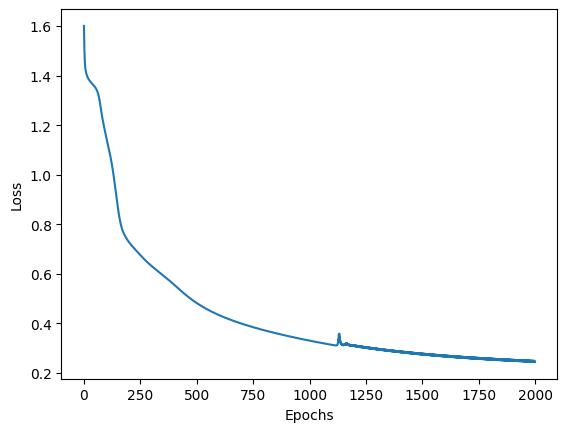

Time taken to run a model 0 is 41.97843384742737


<ipython-input-115-b9cbdcb25397>:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),desc = "training Vectorized back prop",unit='epoch'):


training Vectorized back prop:   0%|          | 0/2000 [00:00<?, ?epoch/s]

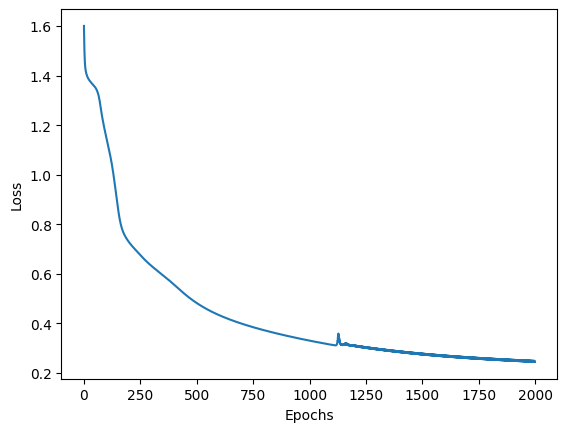

Time taken to run a model 1 is 112.97703719139099


In [136]:
import time
train_models = [InputVectorizedBackPropagation(W1,W2),VectorizedBackPropagation(W1,W2)]
_models = []
for idx,model in enumerate(train_models):
  tic = time.time()
  model.fit(X_train,Y_train_oh,epochs = 2000,learning_rate = .5)
  _models.append(model)
  toc = time.time()
  print("Time taken to run a model {0} is {1}".format(idx,toc-tic))

In [137]:
for idx,model in enumerate(_models):
  Y_train_pred = model.predict(X_train)
  Y_train_pred = np.argmax(Y_train_pred,1)

  Y_test_pred = model.predict(X_test)
  Y_test_pred = np.argmax(Y_test_pred,axis = 1)
  train_accuracy_score = accuracy_score(Y_train_pred,Y_train)
  test_accuracy_score = accuracy_score(Y_test_pred,Y_test)
  print("Model {0}".format(idx))
  print("Training accuracy:",train_accuracy_score)
  print("Testing accuracy:",test_accuracy_score)

Model 0
Training accuracy: 0.9213333333333333
Testing accuracy: 0.94
Model 1
Training accuracy: 0.9213333333333333
Testing accuracy: 0.94


array([0, 2])

In [104]:
Y_train[0]

array([0, 0, 0, 1])